# Business Understanding
Briefly restate the project’s purpose and goals.

Define the research/prediction question (e.g., “Can we predict a job’s salary based on location, company, and job title?”).

Describe why the problem is important or useful.

### Data Preview
- Here, we will give a preview of what the original csv data looks like before we apply feature engineering to it.

In [ ]:
# Preview
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from dotenv import load_dotenv
import os

load_dotenv()

csv_path = os.getenv("CSV_PATHNAME") # To avoid conflicts with different pathnames

# Load data
data = pd.read_csv(csv_path)

data


In [ ]:
# Describe all fields in the data
data.info()
data.head()
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB
         work_year         salary  salary_in_usd
count  9355.000000    9355.000000    9355.000000
mean   2022.760449  149927.981293  150299.495564
std       0.519470   6

# Data Cleaning

### Handling Missing Data

In [ ]:
# Print all fields and sum of any missing values in their respective column
print("Missing Values:")
data.isnull().sum()


Missing Values:


work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

#### Conclusion
- In the untouched dataset, there are absolutely no missing values at all. So there is no need to create any code for accounting for missing values in the dataset

# Data Exploration
- This step will now go through the univariate, bivariate, and multivariate analysis of our cleaned dataset

### Univariate Analysis

In [4]:
# Univariate analysis

### Bivariate Analysis

In [5]:
# Bivariate analysis

### Multivariate Analysis

In [6]:
# Multivariate analysis

# Feature Engineering

### Response variable
- For the dataset we are using, we will be building a prediction model for the salary_in_usd field

### Variable Selection and Creation

In [ ]:
# Step 2: Drop variables not useful for modeling 
data.drop(['salary_currency', 'job_title', 'salary', 'employee_residence'], axis=1, inplace=True)

# Step 3: Construct New Variables

# make 'company_location' categorical with top 6 locations, rest as 'Other'
top_6 = data['company_location'].value_counts().nlargest(6).index

data['company_location'] = np.where(data['company_location'].isin(top_6),
                                    data['company_location'],
                                    'Other')

# Convert all categorical columns to numeric codes
categorical_cols = ['company_location', 'job_category', 'experience_level', 
                    'employment_type', 'work_setting', 'company_size']

for col in categorical_cols:
    data[col + '_code'] = data[col].astype('category').cat.codes

# drop original categorical columns
data_numeric = data.drop(columns=categorical_cols)

# Check result
data_numeric.head()

# Step 4: Scale Data if required


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB
         work_year         salary  salary_in_usd
count  9355.000000    9355.000000    9355.000000
mean   2022.760449  149927.981293  150299.495564
std       0.519470   6

,work_year,salary_in_usd,company_location_code,job_category_code,experience_level_code,employment_type_code,work_setting_code,company_size_code
0,2023,95012,2,4,2,2,0,0
1,2023,186000,6,3,3,2,1,1
2,2023,81800,6,3,3,2,1,1
3,2023,212000,6,7,3,2,1,1
4,2023,93300,6,7,3,2,1,1


Then explain why we created/removed some

### Importance and Multicolinearity

                       work_year  salary_in_usd  company_location_code  \
work_year               1.000000       0.166003               0.182609   
salary_in_usd           0.166003       1.000000               0.223684   
company_location_code   0.182609       0.223684               1.000000   
job_category_code       0.010970       0.295061              -0.041604   
experience_level_code   0.144390       0.281472               0.141378   
employment_type_code    0.043098       0.015168               0.027217   
work_setting_code      -0.068513      -0.021230               0.020757   
company_size_code       0.112634      -0.014439               0.037594   

                       job_category_code  experience_level_code  \
work_year                       0.010970               0.144390   
salary_in_usd                   0.295061               0.281472   
company_location_code          -0.041604               0.141378   
job_category_code               1.000000               0.053191  

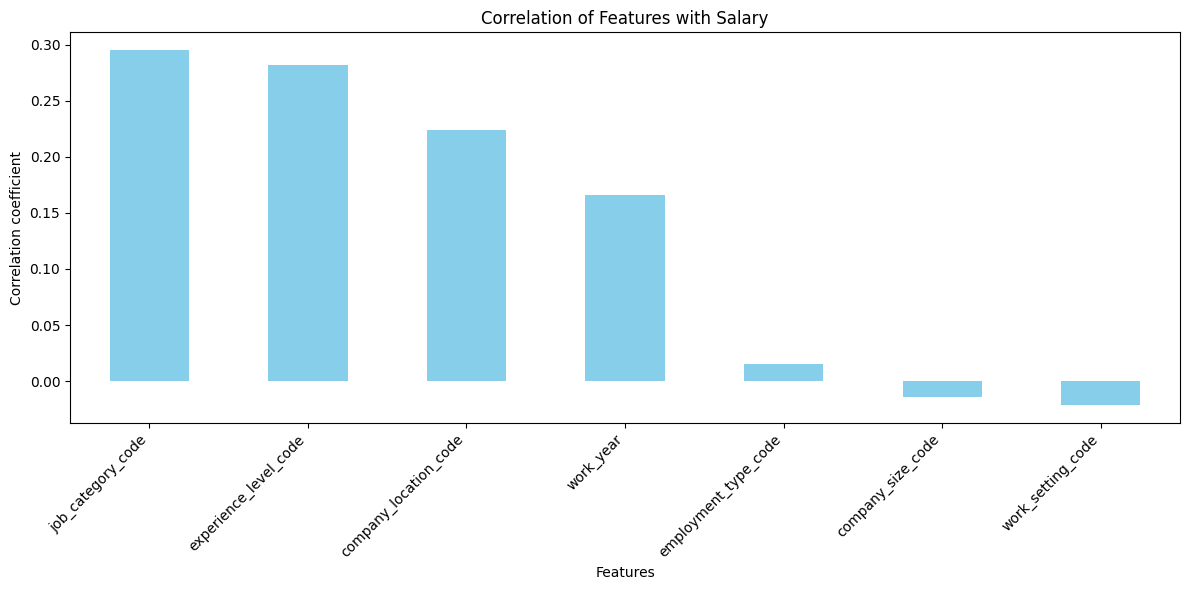

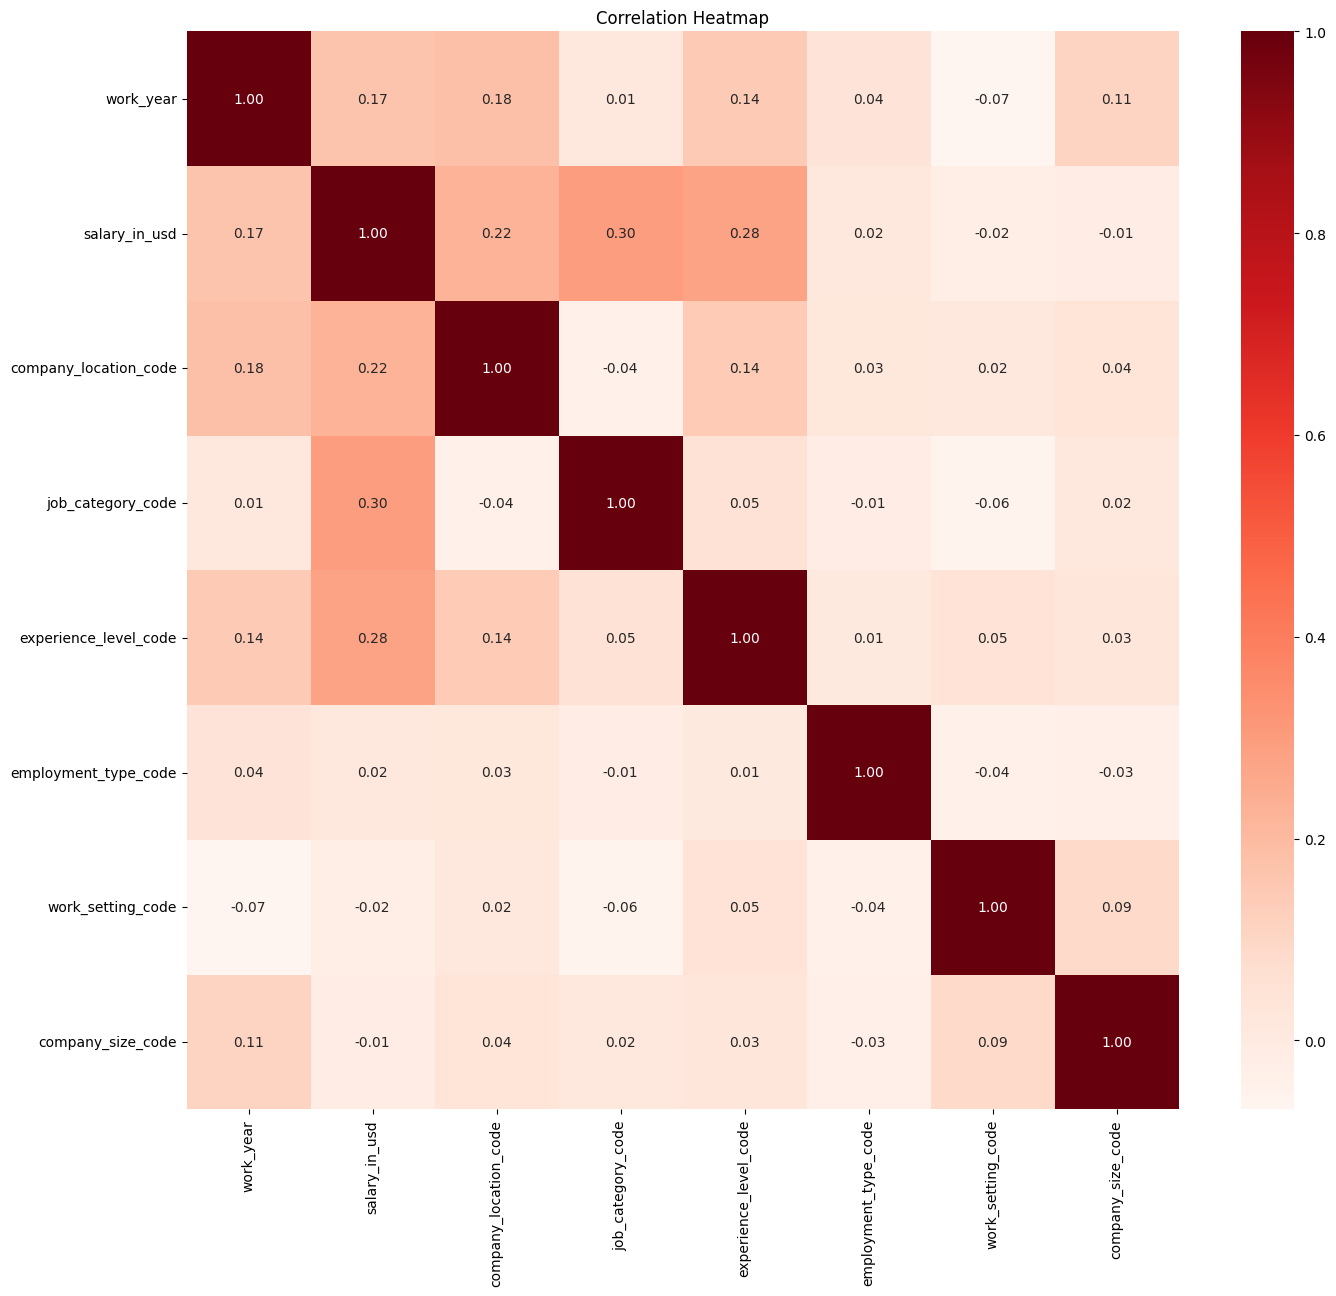

In [8]:
# Step 5: Importance & Multicolinearity 

# Correlation matrix for all numeric features
corrVals = data_numeric.corr()
print(corrVals)

# Compute correlation with target (salary_in_usd)
target_corr = data_numeric.corr()['salary_in_usd'].drop('salary_in_usd')  # drop self-correlation

# Sort correlations
target_corr = target_corr.sort_values(ascending=False)

# Plot as bar chart
plt.figure(figsize=(12,6))
target_corr.plot(kind='bar', color='skyblue')
plt.title("Correlation of Features with Salary")
plt.ylabel("Correlation coefficient")
plt.xlabel("Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Correlations
plt.figure(figsize=(16, 14))
sns.heatmap(data_numeric.corr(), annot=True, cmap='Reds', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# drop if too similar to other variables
# data_numeric.drop('TaxPaid', axis = 1, inplace = True)

Then explain output

# Predictive Modelling
State what we will use. Best to follow notes

# Findings
Summarize main results and conclusions.

Highlight key visualizations that support findings.

Connect insights back to your original business question.

Discuss limitations and possible improvements.

Probably best to split above 4 into 4 separate blocks

# Team Contributions

### Theo's Contributions
- Provided basic code to extract data from Jobs.ie and export it to a csv file
- Created initial template for both DataMining and DataAnalyses files 

### Oisín's Contributions
- Created README.md file to explain project
- Researched potential websites to use for project